<a href="https://colab.research.google.com/github/vaibhav-kadav/Assignments-SummerAnalytics/blob/main/Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading and Initial Inspection
- Loaded training data from 'Train_Data.csv' and test data from 'Test_Data.csv' into pandas DataFrames.
- Dropped the 'SEQN' column from both dataframes, as it is likely an identifier and not relevant for modeling.
- Performed initial checks on the data using `.info()` to understand data types and identify missing values.

### Missing Value Handling and Preprocessing
- Visualized missing values using heatmaps for both training and test data.
- Used `SimpleImputer` within a `ColumnTransformer` to handle missing values:
    - Median imputation for numerical features ('BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN').
    - Mode imputation for categorical features ('DIQ010', 'PAQ605', 'RIAGENDR').
- Applied the preprocessing pipeline to the training data.
- Dropped rows with missing values in the 'age_group' column of the training data.

### Target Variable Encoding
- Ordinally encoded the 'age_group' target variable in the training data, mapping 'Senior' to 1 and 'Adult' to 0.

### Exploratory Data Analysis (Limited)
- Generated histograms for several features ('PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN') in the training data to visualize their distributions.
- Generated a heatmap to visualize the correlation matrix of the numerical features in the training data after imputation and encoding the target variable.

### Model Training and Evaluation
- Used `RandomForestClassifier` for classification.
- Scaled the features using `StandardScaler`.
- Performed stratified k-fold cross-validation (5 splits) on the training data to evaluate the model's performance.
- Calculated and printed the accuracy for each fold and the mean accuracy across all folds.
- Calculated and printed the classification report and confusion matrix after the cross-validation loop.

### Test Data Prediction and Submission
- Applied the preprocessing steps (imputation and scaling) to the test data using the preprocessor and scaler fitted on the training data.
- Generated predictions on the preprocessed and scaled test data using the trained RandomForestClassifier.
- Created a submission DataFrame with the predicted 'age_group'.
- Saved the predictions to a CSV file named 'submission.csv'.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install catboost

In [ ]:
df = pd.read_csv('/content/Train_Data.csv')

In [ ]:
df

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [ ]:
df.drop(columns=['SEQN'], inplace=True)

In [ ]:
test_df = pd.read_csv('/content/Test_Data.csv')

In [ ]:
test_df.drop(columns=['SEQN'], inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  310 non-null    float64
 1   PAQ605    311 non-null    float64
 2   BMXBMI    311 non-null    float64
 3   LBXGLU    311 non-null    float64
 4   DIQ010    311 non-null    float64
 5   LBXGLT    310 non-null    float64
 6   LBXIN     311 non-null    float64
dtypes: float64(7)
memory usage: 17.2 KB


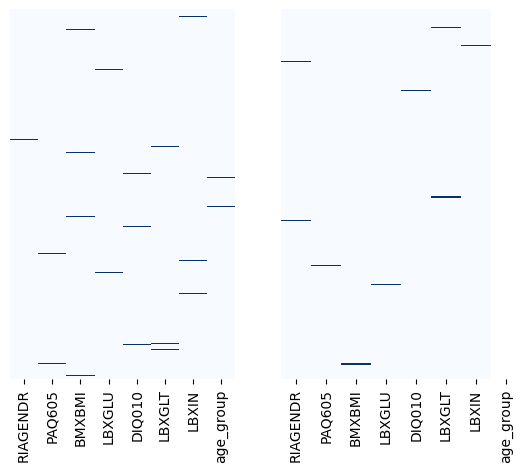

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);
plt.subplot(1, 2, 2)
sns.heatmap(test_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);
plt.show()

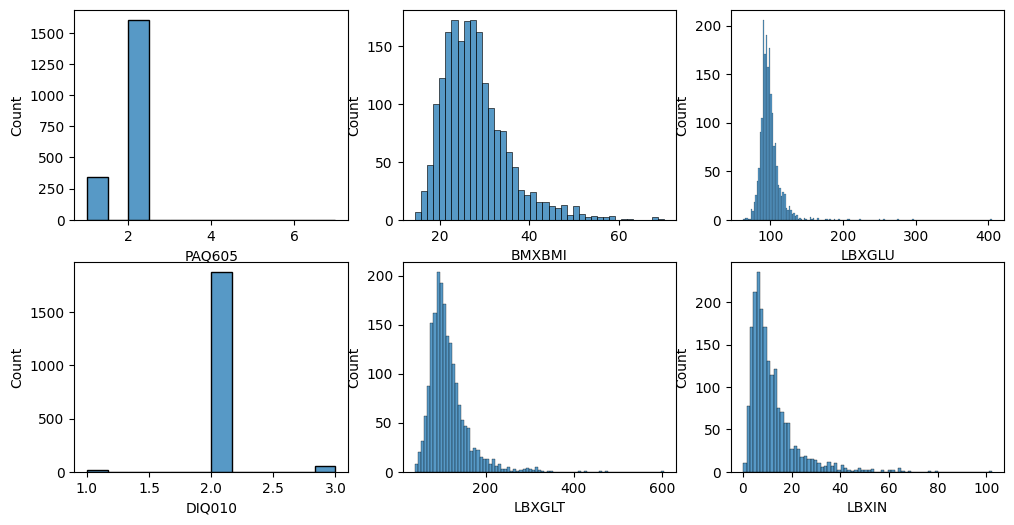

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2, 3, 1)
sns.histplot(df, x='PAQ605')
plt.subplot(2, 3, 2)
sns.histplot(df, x='BMXBMI')
plt.subplot(2, 3, 3)
sns.histplot(df, x='LBXGLU')
plt.subplot(2, 3, 4)
sns.histplot(df, x='DIQ010')
plt.subplot(2, 3, 5)
sns.histplot(df, x='LBXGLT')
plt.subplot(2, 3, 6)
sns.histplot(df, x='LBXIN')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']),
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), ['DIQ010', 'PAQ605', 'RIAGENDR'])
    ],
    remainder='passthrough'
)

clf = Pipeline([('preprocessing', preprocessor)])

In [ ]:
transformed_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'DIQ010', 'PAQ605', 'RIAGENDR', 'age_group']

df_transformed_array = clf.fit_transform(df)
df = pd.DataFrame(df_transformed_array, columns=transformed_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BMXBMI     1966 non-null   object
 1   LBXGLU     1966 non-null   object
 2   LBXGLT     1966 non-null   object
 3   LBXIN      1966 non-null   object
 4   DIQ010     1966 non-null   object
 5   PAQ605     1966 non-null   object
 6   RIAGENDR   1966 non-null   object
 7   age_group  1952 non-null   object
dtypes: object(8)
memory usage: 123.0+ KB


## **Dropping rows containing na values of age_group**

In [ ]:
df.dropna(subset=['age_group'], axis = 0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BMXBMI     1952 non-null   object
 1   LBXGLU     1952 non-null   object
 2   LBXGLT     1952 non-null   object
 3   LBXIN      1952 non-null   object
 4   DIQ010     1952 non-null   object
 5   PAQ605     1952 non-null   object
 6   RIAGENDR   1952 non-null   object
 7   age_group  1952 non-null   object
dtypes: object(8)
memory usage: 137.2+ KB


In [ ]:
df['age_group'].value_counts()

,count
age_group,
Adult,1638
Senior,314


**Ordinal encoding using get_dummies for target variable**

In [ ]:
map_age = {'Senior': 1, 'Adult': 0}
df['age_group'] = df['age_group'].map(map_age)

In [ ]:
df['age_group'].value_counts()

,count
age_group,
0,1638
1,314


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BMXBMI     1952 non-null   object
 1   LBXGLU     1952 non-null   object
 2   LBXGLT     1952 non-null   object
 3   LBXIN      1952 non-null   object
 4   DIQ010     1952 non-null   object
 5   PAQ605     1952 non-null   object
 6   RIAGENDR   1952 non-null   object
 7   age_group  1952 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 137.2+ KB


<Axes: >

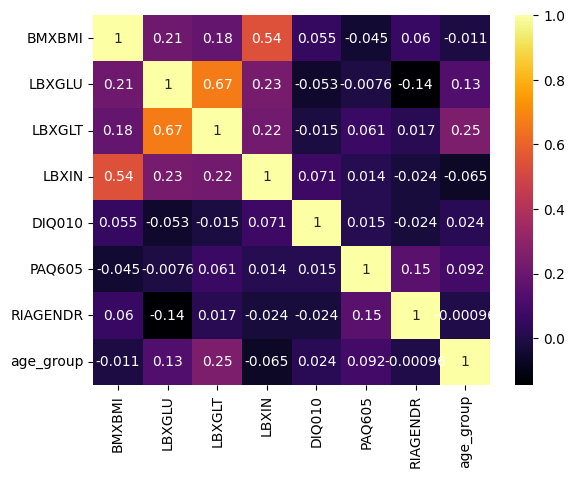

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='inferno')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

X = df.drop(columns=['age_group'])
y = df['age_group']

classifier = RandomForestClassifier(random_state=42)

scaler = StandardScaler()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_test_scaled = scaler.transform(X_fold_test)

    classifier.fit(X_fold_train_scaled, y_fold_train)

    y_fold_pred = classifier.predict(X_fold_test_scaled)

    fold_accuracy = accuracy_score(y_fold_test, y_fold_pred)
    fold_accuracies.append(fold_accuracy)
    print(f"Fold Accuracy: {fold_accuracy:.2f}")

print(f"Mean Accuracy: {sum(fold_accuracies) / len(fold_accuracies):.2f}")

Fold Accuracy: 0.84
Fold Accuracy: 0.84
Fold Accuracy: 0.83
Fold Accuracy: 0.84
Fold Accuracy: 0.85
Mean Accuracy: 0.84


In [1]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
test_preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']),
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), ['DIQ010', 'PAQ605', 'RIAGENDR'])
    ],
    remainder='passthrough'
)

test_df_transformed_array = test_preprocessor.fit_transform(test_df)

preprocessed_test_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'DIQ010', 'PAQ605', 'RIAGENDR']

test_df_processed = pd.DataFrame(test_df_transformed_array, columns=preprocessed_test_cols)

test_df_scaled = scaler.transform(test_df_processed)
test_predictions = classifier.predict(test_df_scaled


In [ ]:
test_predictions.shape

In [ ]:
submission_df = pd.DataFrame({
    'age_group': test_predictions
})
submission_df.to_csv('submission.csv', index=False)